In [2]:
import requests
import pandas as pd
import mysql.connector
import time
import ast
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from collections import Counter

In [3]:
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
database_name = 'league-database'
username = 'admin'
password = 'CowDog019283'
endpoint = 'league-database.cgdkdqtwgxcv.us-east-2.rds.amazonaws.com'
port = 3306
db_name = 'leaguedb'

In [5]:
connection = mysql.connector.connect(host=endpoint, database='leaguedb', user=username, password=password)
cursor = connection.cursor()

def query_to_df(query):
    return pd.read_sql(query, connection)

def get_schema(table):
    query = 'DESCRIBE %s' % table
    cursor.execute(query)
    return cursor.fetchall()

There are seven different tables in this database. First let's take a look at all of the schemas of these tables and get a good idea of what we are working with here. We can also look for potential future joins.

* OneRowGames
* gameSummonerInfo
* items
* matchIDs
* runes
* spells
* champions
* summoners


In [6]:
get_schema('OneRowGames')

[('id', b'varchar(80)', 'YES', bytearray(b''), None, ''),
 ('duration', b'int', 'YES', bytearray(b''), None, ''),
 ('gamemode', b'varchar(35)', 'YES', bytearray(b''), None, ''),
 ('bluewin', b'tinyint(1)', 'YES', bytearray(b''), None, ''),
 ('blueWardsPlaced', b'int', 'YES', bytearray(b''), None, ''),
 ('blueWardsDestroyed', b'int', 'YES', bytearray(b''), None, ''),
 ('blueFirstBlood', b'tinyint(1)', 'YES', bytearray(b''), None, ''),
 ('blueKills', b'int', 'YES', bytearray(b''), None, ''),
 ('blueDeaths', b'int', 'YES', bytearray(b''), None, ''),
 ('blueAssists', b'int', 'YES', bytearray(b''), None, ''),
 ('blueDragons', b'int', 'YES', bytearray(b''), None, ''),
 ('blueHeralds', b'int', 'YES', bytearray(b''), None, ''),
 ('blueBarons', b'int', 'YES', bytearray(b''), None, ''),
 ('blueTowersDestroyed', b'int', 'YES', bytearray(b''), None, ''),
 ('blueInhibitorsDestroyed', b'int', 'YES', bytearray(b''), None, ''),
 ('blueTotalGold', b'int', 'YES', bytearray(b''), None, ''),
 ('blueAverag

In [7]:
get_schema('gameSummonerInfo')

[('summoner1', b'text', 'YES', bytearray(b''), None, ''),
 ('summoner2', b'text', 'YES', bytearray(b''), None, ''),
 ('summoner3', b'text', 'YES', bytearray(b''), None, ''),
 ('summoner4', b'text', 'YES', bytearray(b''), None, ''),
 ('summoner5', b'text', 'YES', bytearray(b''), None, ''),
 ('summoner6', b'text', 'YES', bytearray(b''), None, ''),
 ('summoner7', b'text', 'YES', bytearray(b''), None, ''),
 ('summoner8', b'text', 'YES', bytearray(b''), None, ''),
 ('summoner9', b'text', 'YES', bytearray(b''), None, ''),
 ('summoner10', b'text', 'YES', bytearray(b''), None, ''),
 ('duration', b'tinytext', 'YES', bytearray(b''), None, ''),
 ('gameid', b'varchar(30)', 'YES', bytearray(b''), None, ''),
 ('allSummoners', b'text', 'YES', bytearray(b''), None, ''),
 ('gamemode', b'tinytext', 'YES', bytearray(b''), None, '')]

In [8]:
get_schema('items')

[('itemid', b'int', 'YES', bytearray(b''), None, ''),
 ('item', b'tinytext', 'YES', bytearray(b''), None, '')]

In [9]:
get_schema('matchIDs')

[('matchid', b'varchar(40)', 'YES', bytearray(b''), None, ''),
 ('info', b'mediumtext', 'YES', bytearray(b''), None, '')]

In [10]:
get_schema('runes')

[('runeid', b'int', 'YES', bytearray(b''), None, ''),
 ('rune', b'varchar(20)', 'YES', bytearray(b''), None, '')]

In [11]:
get_schema('spells')

[('spellid', b'int', 'YES', bytearray(b''), None, ''),
 ('spell', b'tinytext', 'YES', bytearray(b''), None, '')]

In [12]:
get_schema('champions')

[('champid', b'int', 'YES', bytearray(b''), None, ''),
 ('champname', b'varchar(20)', 'YES', bytearray(b''), None, ''),
 ('title', b'varchar(30)', 'YES', bytearray(b''), None, ''),
 ('type', b'varchar(30)', 'YES', bytearray(b''), None, ''),
 ('stats', b'text', 'YES', bytearray(b''), None, ''),
 ('passive', b'text', 'YES', bytearray(b''), None, ''),
 ('qspell', b'text', 'YES', bytearray(b''), None, ''),
 ('wspell', b'text', 'YES', bytearray(b''), None, ''),
 ('espell', b'text', 'YES', bytearray(b''), None, ''),
 ('rspell', b'text', 'YES', bytearray(b''), None, ''),
 ('qtip', b'text', 'YES', bytearray(b''), None, ''),
 ('wtip', b'text', 'YES', bytearray(b''), None, ''),
 ('etip', b'text', 'YES', bytearray(b''), None, ''),
 ('rtip', b'text', 'YES', bytearray(b''), None, ''),
 ('lore', b'text', 'YES', bytearray(b''), None, ''),
 ('enemytip', b'text', 'YES', bytearray(b''), None, ''),
 ('allytip', b'text', 'YES', bytearray(b''), None, '')]

In [13]:
get_schema('summoners')

[('summonerid', b'varchar(100)', 'YES', bytearray(b''), None, ''),
 ('summonername', b'varchar(35)', 'YES', bytearray(b''), None, ''),
 ('summonerrank', b'tinytext', 'YES', bytearray(b''), None, ''),
 ('wins', b'int', 'YES', bytearray(b''), None, ''),
 ('losses', b'int', 'YES', bytearray(b''), None, ''),
 ('veteran', b'tinyint(1)', 'YES', bytearray(b''), None, ''),
 ('freshblood', b'tinyint(1)', 'YES', bytearray(b''), None, ''),
 ('inactive', b'tinyint(1)', 'YES', bytearray(b''), None, ''),
 ('hotstreak', b'tinyint(1)', 'YES', bytearray(b''), None, '')]

The table that we will be using most is the `OneRowGames` table because it had data about games that are just in one row. The other tables like `gameSummonerInfo` and `matchIDs` have that as well, but they are more complicated because they have dictionaries or raw json files in the rows. However, we will be using those tables later on.

We can start out by taking a look at the different types of gamemodes there are.

In [14]:
# Q1
# How many gamemodes are there?

q1 = (
    """
    SELECT 
        gamemode, COUNT(id) AS n_games
    FROM 
        OneRowGames
    GROUP BY 
        gamemode"""
)

q1_df = query_to_df(q1)
q1_df

,gamemode,n_games
0,ARAM,12764
1,CLASSIC,62300
2,URF,1107
3,ONEFORALL,135
4,PRACTICETOOL,28
5,TUTORIAL_MODULE_3,2
6,TUTORIAL_MODULE_2,1


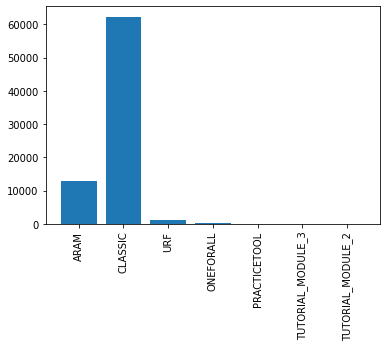

In [15]:
plt.bar(q1_df.gamemode, q1_df.n_games)
plt.xticks(rotation='vertical')
None

It looks like the order of games goes from Classic, Aram, URF, and One For all (OFA). The rest are not games you play with other people. URF and OFA are limited time games (seasonal) so it makes sense that aram and classic gamemodes are most popular. 

Since the most popular gamemode is Classic, we will be querying through that gamemode the most. The League of Legends community has also said that URF should be a full time gamemode because people like it that much. Yet, our data shows that URF is not nearly as popular as the games second-tier full time gamemode, Aram. 

Let's take a look at the difference between these gamemodes to gain insight on the reasons behind the popularity. 

In [16]:
# Q2
# Look at the data for amount of Gold, EXP, Damage, Kills, and Crowd Control (Mechanic in game that limits opponents movement)

q2 = (
    """
    SELECT 
        gamemode, AVG(blueTotalGold + redTotalGold) AS gold, AVG(blueTotalExp + redTotalExp) AS exp, 
        AVG(redDamage + blueDamage) AS damage, AVG(blueKills + redKills) AS kills, AVG(blueCCDealt + redCCDealt) AS cc
    FROM 
        OneRowGames
    GROUP BY
        gamemode"""
)

q2_df = query_to_df(q2)
q2_df[:4]

,gamemode,gold,exp,damage,kills,cc
0,ARAM,133016.1683,182129.8697,247179.2571,90.3867,287.4922
1,CLASSIC,107188.7601,124093.9306,174615.9897,55.5781,216.4261
2,URF,135208.9151,186879.5501,200192.6459,73.0145,221.8067
3,ONEFORALL,126168.4074,152465.7481,160625.1481,62.7259,191.6741


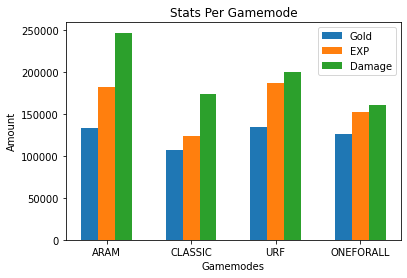

In [17]:
gamemodes = ['ARAM', 'CLASSIC', 'URF', 'ONEFORALL']
x_axis = np.arange(len(gamemodes))

plt.bar(x_axis - .2, q2_df[:4]['gold'], .2, label='Gold')
plt.bar(x_axis, q2_df[:4]['exp'], .2, label='EXP')
plt.bar(x_axis + .2, q2_df[:4]['damage'], .2, label='Damage')
plt.legend()
plt.xticks(x_axis, gamemodes)
plt.xlabel('Gamemodes')
plt.ylabel('Amount')
plt.title('Stats Per Gamemode')
plt.show()

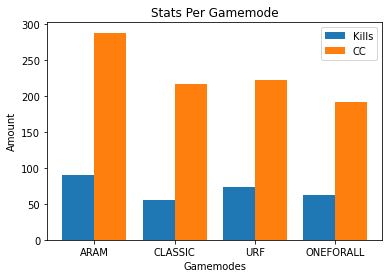

In [18]:
plt.bar(x_axis -.2, q2_df[:4]['kills'], .4, label='Kills')
plt.bar(x_axis +.2, q2_df[:4]['cc'], .4 ,label='CC')
plt.xticks(x_axis, gamemodes)
plt.xlabel('Gamemodes')
plt.ylabel('Amount')
plt.title('Stats Per Gamemode')
plt.legend()
plt.show()

Besides the classic gamemode, for another gamemode to have a lot of popularity, it seems to be that the games need to be more action-pact. What I mean by this is that we can see the most popular games after the Classic gamemode have a lot of Damage, Kills, Gold and CC. This creates more action and fighting in the game which the players enjoy. 

Now that we have looked at all of the gamemodes, let's focus on the Classic gamemode and try and see which data helps a team win. What is the key to winning?   

In [19]:
# Q3 
# Lets take at how first bloods and damage affect a teams win percetage

q3a = (
    """
    SELECT
        gamemode,
        SUM(CASE WHEN bluewin=1 THEN 1 ELSE 0 END) AS bluewins, SUM(CASE WHEN redwin=1 THEN 1 ELSE 0 END) AS redwins,
        SUM(CASE WHEN blueFirstBlood=1 THEN 1 ELSE 0 END) AS bfb, SUM(CASE WHEN redFirstBlood=1 THEN 1 ELSE 0 END) AS rfb,
        SUM(CASE WHEN bluewin=1 AND blueFirstBlood=1 THEN 1 ELSE 0 END) AS bwinFB, SUM(CASE WHEN redwin=1 AND redFirstBlood=1 THEN 1 ELSE 0 END) AS rwinFB,
        SUM(CASE WHEN bluewin=1 AND blueFirstBlood=1 THEN 1 ELSE 0 END) / SUM(CASE WHEN bluewin=1 THEN 1 ELSE 0 END) AS blue_wrfb,
        SUM(CASE WHEN redwin=1 AND redFirstBlood=1 THEN 1 ELSE 0 END) / SUM(CASE WHEN redwin=1 THEN 1 ELSE 0 END) AS red_wrfb, AVG((redDamage + blueDamage) / 2) AS avg_dmg
    FROM 
        OneRowGames
    GROUP BY
        gamemode
    """
)

q3a_df = query_to_df(q3a)
q3a_df = q3a_df[:4]

In [20]:
q3a_df

,gamemode,bluewins,redwins,bfb,rfb,bwinFB,rwinFB,blue_wrfb,red_wrfb,avg_dmg
0,ARAM,6741.0,6015.0,6372.0,6387.0,3741.0,3389.0,0.5550,0.5634,123589.628565
1,CLASSIC,31208.0,31062.0,30704.0,30871.0,18240.0,18268.0,0.5845,0.5881,87307.994872
2,URF,576.0,531.0,573.0,527.0,353.0,307.0,0.6128,0.5782,100096.322945
3,ONEFORALL,74.0,61.0,63.0,67.0,36.0,32.0,0.4865,0.5246,80312.574074


In [21]:
# Let's take a look at each gamemode and their data when their damage is above average
q3b = (
    """
    SELECT
        SUM(CASE WHEN bluewin=1 THEN 1 ELSE 0 END) AS bluewins, SUM(CASE WHEN redwin=1 THEN 1 ELSE 0 END) AS redwins,
        SUM(CASE WHEN blueFirstBlood=1 THEN 1 ELSE 0 END) AS bfb, SUM(CASE WHEN redFirstBlood=1 THEN 1 ELSE 0 END) AS rfb,
        SUM(CASE WHEN bluewin=1 AND blueFirstBlood=1 THEN 1 ELSE 0 END) AS bwinFB, SUM(CASE WHEN redwin=1 AND redFirstBlood=1 THEN 1 ELSE 0 END) AS rwinFB,
        SUM(CASE WHEN bluewin=1 AND blueFirstBlood=1 THEN 1 ELSE 0 END) / SUM(CASE WHEN bluewin=1 THEN 1 ELSE 0 END) AS blue_wrfb
    FROM 
        OneRowGames
    WHERE
        gamemode='%s' AND %sDamage > %i
        """
)

teams = ['blue', 'red']
for team in teams:
    for gamemode in gamemodes:
        print(team, gamemode)
        df = query_to_df((q3b) % (gamemode, team, float(q3a_df[q3a_df['gamemode'] == gamemode]['avg_dmg'])))
        print(df, int(df[team+'wins']) / float(q3a_df[q3a_df['gamemode'] == gamemode][team+'wins']))

blue ARAM
   bluewins  redwins     bfb     rfb  bwinFB  rwinFB  blue_wrfb
0    3289.0   2420.0  2920.0  2788.0  1742.0  1242.0     0.5296 0.487909805666815
blue CLASSIC
   bluewins  redwins      bfb      rfb  bwinFB  rwinFB  blue_wrfb
0   17086.0  11863.0  14878.0  13815.0  9242.0  6117.0     0.5409 0.5474878236349654
blue URF
   bluewins  redwins    bfb    rfb  bwinFB  rwinFB  blue_wrfb
0     307.0    223.0  282.0  245.0   178.0   117.0     0.5798 0.5329861111111112
blue ONEFORALL
   bluewins  redwins   bfb   rfb  bwinFB  rwinFB  blue_wrfb
0      42.0     22.0  35.0  28.0    22.0     9.0     0.5238 0.5675675675675675
red ARAM
   bluewins  redwins     bfb     rfb  bwinFB  rwinFB  blue_wrfb
0    2628.0   2936.0  2724.0  2839.0  1348.0  1560.0     0.5129 0.4881130507065669
red CLASSIC
   bluewins  redwins      bfb      rfb  bwinFB  rwinFB  blue_wrfb
0   11545.0  17202.0  13652.0  14843.0  5947.0  9340.0     0.5151 0.5537956345373769
red URF
   bluewins  redwins    bfb    rfb  bwinFB  rwi

It is interesting that first blood gives you higher odds of winning the game. This data also matches up with sources online saying that if you get first blood, the chances of winning increases 8-9 percent of classic games. I think that one for all and URF does not have enough data and that's why the win rates are different for the blue and red team.

It seems that the increased damage does have a positive effect on the winrate. For classic games the chances of winning can go up at least 3-4%. It seems like the above average damage helps a lot in Aram and OFA, maybe this is because there are a lot of other variables here and a team need more than just the average damage, but overwhelming damage perhaps. Or this data does not help that much in winning for those gamemodes. 
 
For some reason I could not use the new column names I had assigned to them to get the winrate of when you had first blood and won compared to total wins. I did not use count, as I would have had to make multiple queries with `WHERE`.
 
We can say that first blood does increase the probability of winning a game. Now let's take a look at only classic games and analyze how the duration of the game affects the game. Since the duration will affect all data differently, even on how the outcome of the game is handled, we should take a closer look at the data by splitting the data into groups by duration. 

In [22]:
# Q4
# First we will see the data as it is

q4a = (
    """
    SELECT 
        blueKills, redKills, blueTowersDestroyed, redTowersDestroyed, 
        blueInhibitorsDestroyed, redInhibitorsDestroyed, blueDragons, redDragons
    FROM
        OneRowGames
    WHERE
        gamemode='CLASSIC'
    """
)

q4a_df = query_to_df(q4a)


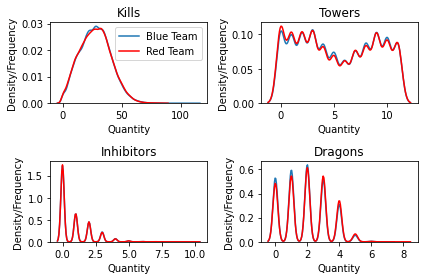

In [23]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)

sns.distplot(q4a_df.blueKills, hist=False, label='Blue Team', ax=ax1)
sns.distplot(q4a_df.redKills, hist=False, label='Red Team', color='r', ax=ax1)
ax1.legend()
ax1.set_title('Kills')

sns.distplot(q4a_df.blueTowersDestroyed, hist=False, ax=ax2)
sns.distplot(q4a_df.redTowersDestroyed, hist=False, color='r', ax=ax2)
ax2.set_title('Towers')

sns.distplot(q4a_df.blueInhibitorsDestroyed, hist=False, ax=ax3)
sns.distplot(q4a_df.redInhibitorsDestroyed, hist=False, color='r', ax=ax3)
ax3.set_title('Inhibitors')

sns.distplot(q4a_df.blueDragons, hist=False, ax=ax4)
sns.distplot(q4a_df.redDragons, hist=False, color='r', ax=ax4)
ax4.set_title('Dragons')

plt.tight_layout()

for ax in fig.get_axes():
    ax.set(xlabel='Quantity', ylabel='Density/Frequency')


As we can see the kills graph look fairly normal, the rest are more multimodal, but we can say for sure that the red and blue team are almost the same. Since this is true, we don't need to worry about splitting the teams, but just splitting the duration.

In [24]:
# We are going to split the data at 20 minutes up until 20 minutes can be considered the early-mid stages of the game and beyond 30 is late. 
# As a player of the game, I felt that this split in time is appropriate 

q4b = (
    """
    SELECT 
        (blueKills + redKills) AS kills, (blueTowersDestroyed + redTowersDestroyed) AS towers, 
        (blueInhibitorsDestroyed + redInhibitorsDestroyed) AS inhibitors, (blueDragons + redDragons) AS dragons
    FROM
        OneRowGames
    WHERE
        gamemode='CLASSIC' AND duration > 2000
    """
)

q4b_df = query_to_df(q4b)

q4c = (
    """
    SELECT 
        (blueKills + redKills) AS kills, (blueTowersDestroyed + redTowersDestroyed) AS towers, 
        (blueInhibitorsDestroyed + redInhibitorsDestroyed) AS inhibitors, (blueDragons + redDragons) AS dragons
    FROM
        OneRowGames
    WHERE
        gamemode='CLASSIC' AND duration < 2000
    """
)

q4c_df = query_to_df(q4c)

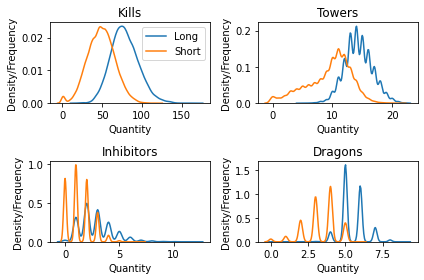

In [25]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)

sns.distplot(q4b_df.kills, hist=False, label='Long', ax=ax1)
sns.distplot(q4c_df.kills, hist=False, label='Short', ax=ax1)
ax1.legend()
ax1.set_title('Kills')

sns.distplot(q4b_df.towers, hist=False, ax=ax2)
sns.distplot(q4c_df.towers, hist=False, ax=ax2)
ax2.set_title('Towers')

sns.distplot(q4b_df.inhibitors, hist=False, ax=ax3)
sns.distplot(q4c_df.inhibitors, hist=False, ax=ax3)
ax3.set_title('Inhibitors')

sns.distplot(q4b_df.dragons, hist=False, ax=ax4)
sns.distplot(q4c_df.dragons, hist=False, ax=ax4)
ax4.set_title('Dragons')

plt.tight_layout()

for ax in fig.get_axes():
    ax.set(xlabel='Quantity', ylabel='Density/Frequency')

We can see the bumps at 0 and this usually just means that a game has been remade, usually when a player failed to connect to a game, the game ends because it is unfair to play a game a player down.   

As we can see that the data shifts a lot more as the game progresses, which makes for a lot of variability that can only be sorted by going deeper into the game's data, which is what we are going to do now.

In [26]:
item = "SELECT * FROM items"
cursor.execute(item)
items_list = cursor.fetchall()

rune = "SELECT * FROM runes"
cursor.execute(rune)
runes_list = cursor.fetchall()

spell = "SELECT * FROM spells"
cursor.execute(spell)
spells_list = cursor.fetchall()

champion = "SELECT * FROM champions"
cursor.execute(champion)
champions_list = cursor.fetchall()

In [27]:
item_dict = dict(items_list)
rune_dict = dict(runes_list)
spell_dict = dict(spells_list)
champ_dict = {}
for champ in champions_list:
    champ_dict[champ[0]] = champ[1]

In [28]:
def row_to_game(row):
    participants = []
    for summoner in row[:10]:
        info = ast.literal_eval(summoner)
        participants.append(info)
    df = pd.DataFrame(participants)

    # Retrieving item names
    item_one = []
    item_two = []
    item_three = []
    item_four = [] 
    item_five = []
    item_six = []
    item_seven = []
    for row in participants:
        one = row['item1']
        two = row['item2']
        three = row['item3']
        four = row['item4']
        five = row['item5']
        six = row['item6']
        seven = row['item7']
        if one == 0:
            item_one.append('None')
        else:
            item_one.append(item_dict[one])
        if two == 0:
            item_two.append('None')
        else:
            item_two.append(item_dict[two])
        if three == 0:
            item_three.append('None')
        else:
            item_three.append(item_dict[three])
        if four == 0:
            item_four.append('None')
        else:
            item_four.append(item_dict[four])
        if five == 0:
            item_five.append('None')
        else:
            item_five.append(item_dict[five])
        if six == 0:
            item_six.append('None')
        else:
            item_six.append(item_dict[six])
        if seven == 0:
            item_seven.append('None')
        else:
            item_seven.append(item_dict[seven])

    # Retrieving spell names
    spell_one = []
    spell_two = []
    for row in participants:
        spell_one.append(spell_dict[row['spell1']])
        spell_two.append(spell_dict[row['spell2']])

    # Retrieving champion names
    champ_game = []
    for row in participants:
        champ_game.append(champ_dict[row['champion']])

    # Retrieving rune names
    rune_one = []
    rune_two = []
    rune_three = []
    rune_four = [] 
    rune_five = []
    rune_six = []
    for row in participants:
        rune_one.append(rune_dict[row['rune1']])
        rune_two.append(rune_dict[row['rune2']])
        rune_three.append(rune_dict[row['rune3']])
        rune_four.append(rune_dict[row['rune4']])
        rune_five.append(rune_dict[row['rune5']])
        rune_six.append(rune_dict[row['rune6']])
    
    # Updating dataframe
    df['champion'] = champ_game
    df['spell1'] = spell_one
    df['spell2'] = spell_two
    df['item1'] = item_one
    df['item2'] = item_two
    df['item3'] = item_three
    df['item4'] = item_four
    df['item5'] = item_five
    df['item6'] = item_six
    df['item7'] = item_seven
    df['rune1'] = rune_one
    df['rune2'] = rune_two
    df['rune3'] = rune_three
    df['rune4'] = rune_four
    df['rune5'] = rune_five
    df['rune6'] = rune_six

    return df

In [29]:
l = " SELECT * FROM gameSummonerInfo LIMIT 5"
limit = query_to_df(l)

In [30]:
limit

,summoner1,summoner2,summoner3,summoner4,summoner5,summoner6,summoner7,summoner8,summoner9,summoner10,duration,gameid,allSummoners,gamemode
0,"{'summoner': 'KIMMYBO123', 'champion': 350, 's...","{'summoner': 'ishaw1', 'champion': 31, 'spell1...","{'summoner': 'JJ41411', 'champion': 67, 'spell...","{'summoner': 'Shoogz12', 'champion': 110, 'spe...","{'summoner': 'PixelGaMERCaT', 'champion': 203,...","{'summoner': 'zackvi', 'champion': 246, 'spell...","{'summoner': 'Soundwave2017', 'champion': 30, ...","{'summoner': 'ashtonXX', 'champion': 21, 'spel...","{'summoner': 'Badassjones', 'champion': 254, '...","{'summoner': 'psychoquack', 'champion': 89, 's...",20m 35s,NA1_4366795660,"[""{'summoner': 'KIMMYBO123', 'champion': 350, ...",ARAM
1,"{'summoner': 'Mina Sana Momo ', 'champion': 21...","{'summoner': 'McDflurry', 'champion': 41, 'spe...","{'summoner': 'boileddove69', 'champion': 67, '...","{'summoner': 'HymenPulverizr', 'champion': 53,...","{'summoner': 'Pattse', 'champion': 143, 'spell...","{'summoner': 'I Win at 20', 'champion': 42, 's...","{'summoner': 'FreeToKillU', 'champion': 133, '...","{'summoner': 'Soundwave2017', 'champion': 777,...","{'summoner': 'irishcb187', 'champion': 498, 's...","{'summoner': 'idontplaythemeta', 'champion': 3...",23m 55s,NA1_4366527467,"[""{'summoner': 'Mina Sana Momo ', 'champion': ...",ARAM
2,"{'summoner': 'TooMuchRice', 'champion': 89, 's...","{'summoner': 'OstrichJacket', 'champion': 41, ...","{'summoner': 'Soundwave2017', 'champion': 35, ...","{'summoner': 'MikuNakanoooo', 'champion': 67, ...","{'summoner': 'TenorWill', 'champion': 518, 'sp...","{'summoner': 'palalaz', 'champion': 34, 'spell...","{'summoner': 'oOholymolyOo', 'champion': 10, '...","{'summoner': 'JDDan', 'champion': 234, 'spell1...","{'summoner': 'Odobee', 'champion': 876, 'spell...","{'summoner': 'TenLog', 'champion': 107, 'spell...",20m 6s,NA1_4366533737,"[""{'summoner': 'TooMuchRice', 'champion': 89, ...",ARAM
3,"{'summoner': 'Karishalla', 'champion': 43, 'sp...","{'summoner': 'MrChubbin', 'champion': 150, 'sp...","{'summoner': 'ilikechips8', 'champion': 74, 's...","{'summoner': 'buckaroo22', 'champion': 234, 's...","{'summoner': 'LitCroissant', 'champion': 142, ...","{'summoner': 'Jason1991sens', 'champion': 235,...","{'summoner': 'MaInGn', 'champion': 104, 'spell...","{'summoner': 'GelatinousN00b', 'champion': 50,...","{'summoner': 'AVNOIR', 'champion': 134, 'spell...","{'summoner': 'Soundwave2017', 'champion': 61, ...",23m 53s,NA1_4365266709,"[""{'summoner': 'Karishalla', 'champion': 43, '...",ARAM
4,"{'summoner': 'Lemineraz', 'champion': 103, 'sp...","{'summoner': 'zzZaxiade', 'champion': 75, 'spe...","{'summoner': 'KnightMm', 'champion': 13, 'spel...","{'summoner': 'Soundwave2017', 'champion': 32, ...","{'summoner': 'Castles', 'champion': 122, 'spel...","{'summoner': 'bearsforlife54', 'champion': 96,...","{'summoner': 'SomQuite', 'champion': 266, 'spe...","{'summoner': 'jjjjjji95', 'champion': 17, 'spe...","{'summoner': 'Umbrellak08', 'champion': 99, 's...","{'summoner': 'hhh0000', 'champion': 117, 'spel...",15m 10s,NA1_4365293282,"[""{'summoner': 'Lemineraz', 'champion': 103, '...",ARAM


In [31]:
test = row_to_game(limit.iloc[0])
test.iloc[:, :15]

,summoner,champion,spell1,spell2,kills,deaths,assists,totalDamageDealt,goldEarned,champLevel,csPerMin,totalMinionsKilled,item1,item2,item3
0,KIMMYBO123,Yuumi,Heal,Clarity,3,6,30,23609,12184,18,0.6,12,Luden's Tempest,Redemption,Bandleglass Mirror
1,ishaw1,Cho'Gath,Mark,Flash,10,11,25,75793,13937,18,1.7,35,Fimbulwinter,Gargoyle Stoneplate,None
2,JJ41411,Vayne,Ghost,Flash,10,10,13,77645,14241,16,3.6,75,Immortal Shieldbow,Berserker's Greaves,Guinsoo's Rageblade
3,Shoogz12,Varus,Flash,Heal,11,8,23,71397,14266,18,2.6,53,Muramana,Ionian Boots of Lucidity,Axiom Arc
4,PixelGaMERCaT,Kindred,Flash,Ghost,8,11,17,60994,13585,17,2.7,55,Guardian's Hammer,The Collector,Berserker's Greaves
5,zackvi,Qiyana,Mark,Flash,11,9,16,47789,13225,17,1.3,26,Duskblade of Draktharr,Plated Steelcaps,The Collector
6,Soundwave2017,Karthus,Flash,Ghost,11,7,24,94200,15945,18,3.6,75,Liandry's Anguish,Sorcerer's Shoes,Demonic Embrace
7,ashtonXX,Miss Fortune,Flash,Clarity,13,7,26,93958,16343,18,3.6,74,Eclipse,The Collector,Axiom Arc
8,Badassjones,Vi,Flash,Mark,8,12,25,45827,12873,17,0.3,7,Giant's Belt,None,Sterak's Gage
9,psychoquack,Leona,Flash,Heal,3,7,29,31320,12512,17,1.4,28,Mercury's Treads,Sunfire Aegis,Warmog's Armor


In [32]:
test.iloc[:, 15:]

,item4,item5,item6,item7,rune1,rune2,rune3,rune4,rune5,rune6,win
0,Seraph's Embrace,Hextech Alternator,Needlessly Large Rod,None,SummonAery,ManaflowBand,Transcendence,Scorch,PresenceOfMind,CutDown,False
1,Frostfire Gauntlet,Warmog's Armor,Plated Steelcaps,Poro-Snax,GraspOfTheUndying,FontOfLife,Conditioning,Overgrowth,PresenceOfMind,LegendTenacity,False
2,Blade of The Ruined King,Vampiric Scepter,Guardian's Hammer,None,LethalTempo,Triumph,LegendAlacrity,CoupDeGrace,CheapShot,TreasureHunter,False
3,Dagger,Duskblade of Draktharr,Serylda's Grudge,None,DarkHarvest,TasteOfBlood,EyeballCollection,TreasureHunter,PresenceOfMind,CoupDeGrace,False
4,Kraken Slayer,Infinity Edge,Vampiric Scepter,Poro-Snax,LethalTempo,Triumph,LegendBloodline,LastStand,EyeballCollection,TreasureHunter,False
5,Serylda's Grudge,Caulfield's Warhammer,Cloth Armor,None,DarkHarvest,SuddenImpact,EyeballCollection,UltimateHunter,AbsoluteFocus,Scorch,True
6,Rabadon's Deathcap,Cosmic Drive,Amplifying Tome,None,FirstStrike,MagicalFootwear,FuturesMarket,CosmicInsight,Transcendence,GatheringStorm,True
7,Berserker's Greaves,Lord Dominik's Regards,Edge of Night,None,DarkHarvest,TasteOfBlood,EyeballCollection,TreasureHunter,ManaflowBand,Scorch,True
8,Death's Dance,Plated Steelcaps,Eclipse,Poro-Snax,HailOfBlades,SuddenImpact,EyeballCollection,UltimateHunter,Unflinching,Conditioning,True
9,Thornmail,Cloth Armor,Cloth Armor,Poro-Snax,Conqueror,Triumph,LegendAlacrity,LastStand,GatheringStorm,Transcendence,True


In [51]:
# Q5
# Now that we have everything set up, we can look more closely at games of interest

q5 = (
    """
    SELECT
        (OneRowGames.blueDamage + OneRowGames.redDamage) AS damage, gameSummonerInfo.*
    FROM
        OneRowGames
    INNER JOIN
        gameSummonerInfo
    ON 
        OneRowGames.id = gameSummonerInfo.gameid
    WHERE 
        gameSummonerInfo.gamemode='CLASSIC'
    GROUP BY
        OneRowGames.id
    ORDER BY
        damage DESC
    LIMIT 1000
    """
)

q5_df = query_to_df(q5)

In [53]:
# Retrieving some information of the highest damaging character of each game

highest = []
next_highest = []
for row in q5_df.itertuples():
    df = row_to_game(row[2:])
    values = sorted(df['totalDamageDealt'])
    first = int(str(df[df['totalDamageDealt'] == values[-1]]['champion'])[0])
    second = int(str(df[df['totalDamageDealt'] == values[-2]]['champion'])[0])
    first_champ = df[df['totalDamageDealt'] == values[-1]]['champion'][first]
    second_champ = df[df['totalDamageDealt'] == values[-2]]['champion'][second]
    highest.append((first_champ, df[df['champion'] == first_champ]['win'][first]))
    next_highest.append((second_champ, df[df['champion'] == second_champ]['win'][second]))

In [54]:
# Getting the amount of times specific champions show up and counting the wins

highest_champs = []
for row in highest:
    highest_champs.append(row[0])
count_high = Counter(highest_champs)
highest_sorted = {}
for row in sorted(count_high, key=count_high.get)[::-1]:
    highest_sorted[row] = count_high[row]

second_champs = []
for row in next_highest:
    second_champs.append(row[0])
count_second = Counter(second_champs)
second_sorted = {}
for row in sorted(count_second, key=count_second.get)[::-1]:
    second_sorted[row] = count_second[row]

In [55]:
highest_wins = []
for row in highest:
    highest_wins.append(row[1])
Counter(highest_wins)

Counter({False: 449, True: 551})

In [56]:
second_wins = []
for row in next_highest:
    second_wins.append(row[1])
Counter(second_wins)

Counter({True: 535, False: 465})

In [57]:
highest_sorted

{'Gangplank': 63,
 'Yasuo': 35,
 'Veigar': 32,
 'Ezreal': 32,
 'Kayn': 32,
 'Yone': 30,
 'Tristana': 27,
 'Jhin': 26,
 'Graves': 24,
 "Bel'Veth": 22,
 'Diana': 22,
 'Draven': 20,
 'Zeri': 20,
 "Kai'Sa": 19,
 'Kayle': 19,
 'Tryndamere': 18,
 'Illaoi': 17,
 'Miss Fortune': 17,
 'Lillia': 17,
 'Kindred': 15,
 'Shyvana': 15,
 'Nasus': 15,
 'Irelia': 14,
 'Ekko': 14,
 'Master Yi': 14,
 'Xayah': 12,
 'Lucian': 12,
 'Sion': 12,
 'Karthus': 12,
 'Garen': 11,
 'Sivir': 11,
 'Twitch': 11,
 'Jinx': 11,
 'Samira': 11,
 'Mordekaiser': 11,
 'Ziggs': 10,
 'Urgot': 10,
 'Ashe': 10,
 'Viktor': 10,
 'Trundle': 10,
 'Caitlyn': 10,
 'Teemo': 10,
 'Aphelios': 10,
 'Zed': 8,
 'Talon': 8,
 'Seraphine': 8,
 'Viego': 8,
 'Corki': 7,
 'Kalista': 7,
 'Vladimir': 6,
 'Gwen': 6,
 'Aatrox': 5,
 "Kog'Maw": 5,
 'Lux': 5,
 'Volibear': 5,
 'Jax': 5,
 'Taliyah': 5,
 'Sett': 5,
 'Ryze': 5,
 'Akshan': 4,
 'Nidalee': 4,
 'Dr. Mundo': 4,
 'Rengar': 4,
 'Katarina': 4,
 "Kha'Zix": 4,
 'Ivern': 4,
 "Cho'Gath": 4,
 'Darius': 4,

In [58]:
second_sorted

{'Yasuo': 36,
 'Ezreal': 34,
 'Kayn': 32,
 'Jhin': 27,
 'Miss Fortune': 23,
 'Diana': 22,
 'Yone': 22,
 'Zeri': 21,
 'Caitlyn': 21,
 'Shyvana': 20,
 'Teemo': 18,
 'Ekko': 18,
 'Jinx': 17,
 'Gangplank': 17,
 'Mordekaiser': 16,
 'Tristana': 16,
 'Garen': 16,
 'Lillia': 16,
 'Irelia': 16,
 'Graves': 15,
 'Draven': 15,
 'Vayne': 14,
 'Illaoi': 14,
 "Bel'Veth": 14,
 "Kai'Sa": 14,
 'Veigar': 14,
 'Xayah': 12,
 'Twitch': 12,
 'Samira': 12,
 'Lucian': 11,
 'Viego': 11,
 'Sion': 11,
 "Kha'Zix": 11,
 'Karthus': 11,
 'Viktor': 10,
 'Sivir': 10,
 'Volibear': 10,
 'Ashe': 10,
 'Kayle': 9,
 'Swain': 9,
 'Trundle': 9,
 'Sett': 9,
 'Urgot': 9,
 'Kindred': 9,
 'Tryndamere': 9,
 'Rengar': 8,
 'Zed': 8,
 'Kalista': 8,
 'Master Yi': 8,
 'Shaco': 8,
 'Renekton': 8,
 'Nasus': 8,
 'Malzahar': 7,
 'Dr. Mundo': 7,
 'Udyr': 7,
 'Taliyah': 7,
 'Quinn': 7,
 'Olaf': 7,
 'Warwick': 6,
 'Riven': 6,
 'Singed': 6,
 'Jax': 6,
 'Darius': 6,
 'Fiora': 6,
 'Nocturne': 6,
 'Ziggs': 5,
 'Sylas': 5,
 'Lee Sin': 5,
 'Azir': 5

The results were no surprise as it is expected that the more damage one inflicts, the easier the game would be won. 

In the query, I also had to use `GROUP BY` because there were repeating games that were showing up and so I had to make the id's unique by using `GROUP BY`. I think I could have used `DISTINCT`, but I chose the other method instead.

I also was curious on how the team as a whole would do. 

In [59]:
predictions = []
actual = []
for row in q5_df.itertuples():
    df = row_to_game(row[2:])
    blue = df[:5]
    red = df[5:]
    if df['win'][0] == True:
        actual.append('blue win')
    else:
        actual.append('red win')
    if blue['totalDamageDealt'].sum() > red['totalDamageDealt'].sum():
        predictions.append('blue win')
    else:
        predictions.append('red win')

In [60]:
answers = []
for i in range(len(predictions)):
    answers.append(predictions[i] == actual[i])
Counter(answers)

Counter({False: 390, True: 610})

Win rate of 61 percent! Damage is a very important factor in each game. 

Of course, there could be a lot more analysis done here, and there could definitely be some hypothesis testing that can be done here with all the data. However, this has been a good amount of analysis and we will stop here for now.